<a href="https://colab.research.google.com/github/mebhuvanshankar/PROJECTS/blob/main/Sustainable_Traffic_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = "/content/Ahmedabad.csv"
data = pd.read_csv(file_path)

In [3]:
data.columns = [
    "City", "Date", "Column3", "Column4", "CO2_Emission",
    "Feature1", "Feature2", "Feature3", "Feature4", "Feature5",
    "Feature6", "Feature7", "Feature8", "Feature9", "Feature10", "Category"
]

In [4]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [5]:
data = data.dropna(subset=["Date"])

In [6]:
numerical_columns = [
    "CO2_Emission", "Feature1", "Feature2", "Feature3", "Feature4",
    "Feature5", "Feature6", "Feature7", "Feature8", "Feature9", "Feature10"
]
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [7]:
data_cleaned = data.dropna(subset=numerical_columns)

In [8]:
sns.set(style="whitegrid")

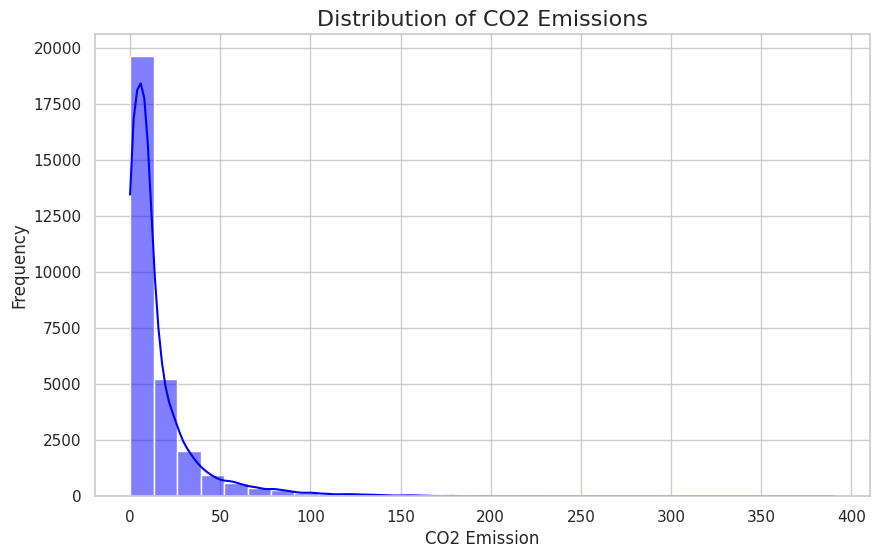

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['CO2_Emission'], kde=True, bins=30, color='blue')
plt.title('Distribution of CO2 Emissions', fontsize=16)
plt.xlabel('CO2 Emission', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

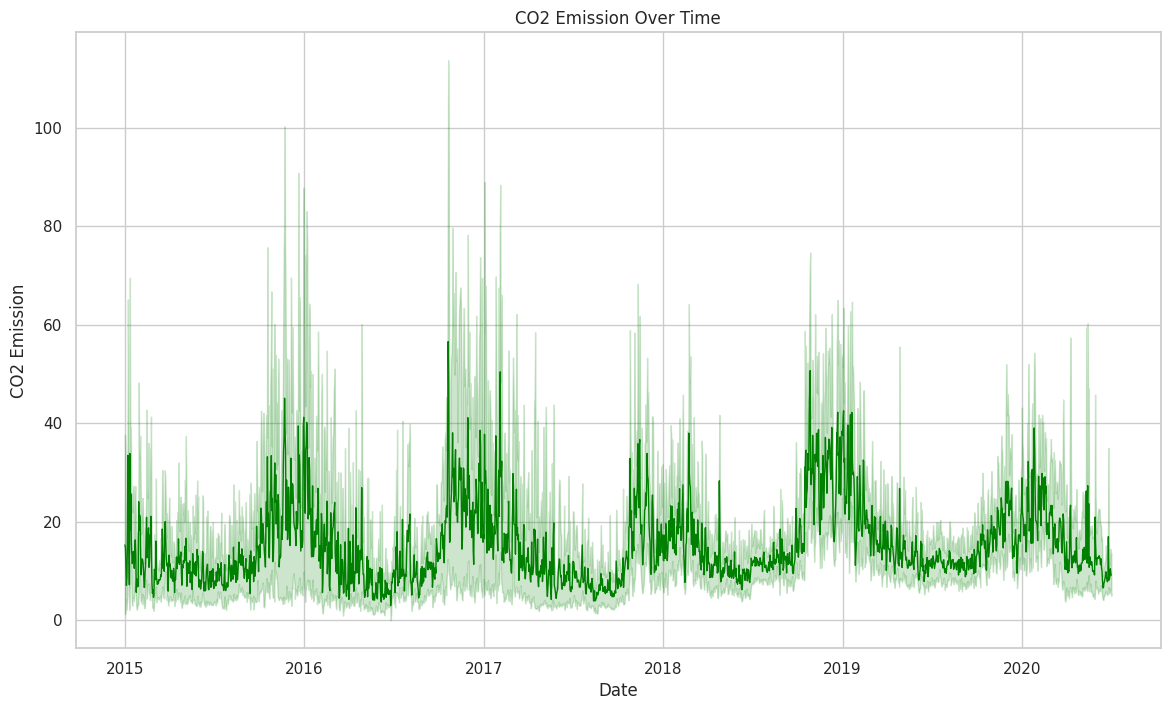

In [15]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='CO2_Emission', data=data_cleaned, color='green', linewidth=1)
plt.title('CO2 Emission Over Time')
plt.xlabel('Date', fontsize=12)
plt.ylabel('CO2 Emission', fontsize=12)
plt.show()

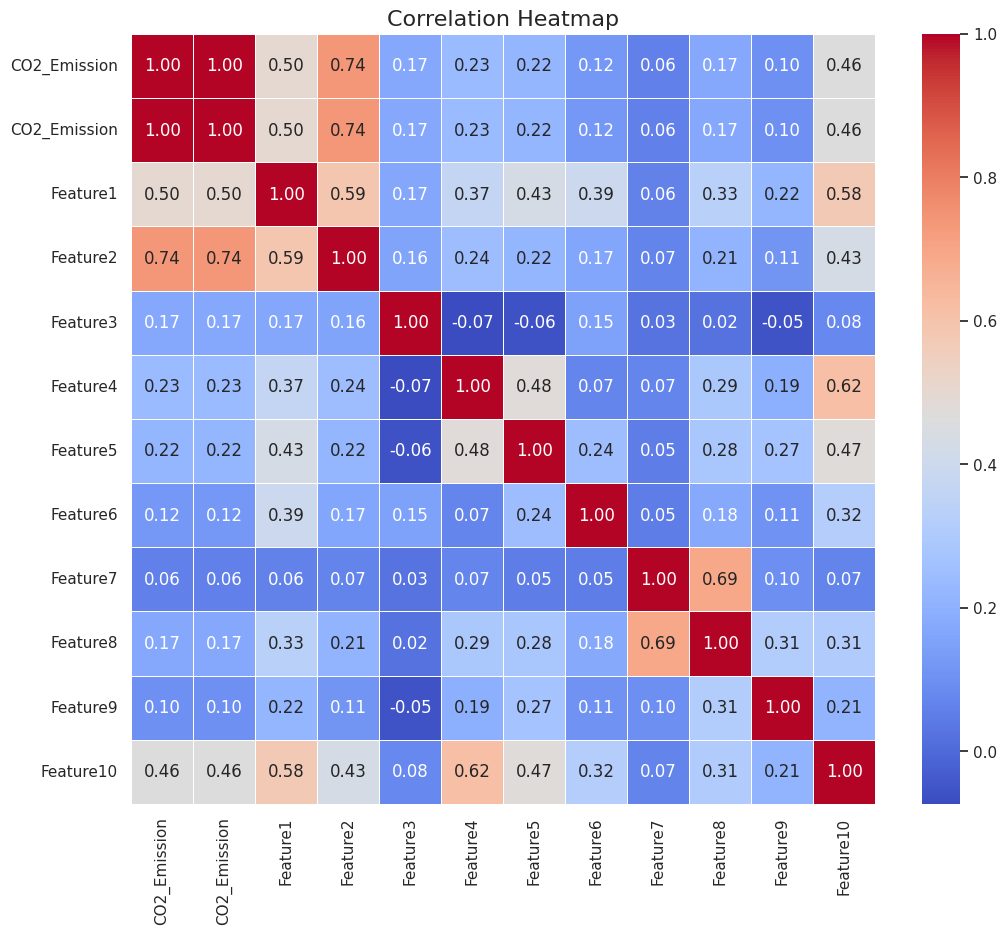

In [16]:
plt.figure(figsize=(12, 10))
corr_matrix = data_cleaned[["CO2_Emission"] + numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew, jarque_bera
#from scipy.stats import fisher_exact # if you meant fisher exact test
#from scipy.stats import kurtosis # if you meant kurtosis



In [19]:
X = data_cleaned[["Feature1", "Feature2", "Feature3", "Feature4", "Feature5"]]
y = data_cleaned["CO2_Emission"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Multivariate Linear Regression Results:\nMean Squared Error: {mse}\nR2 Score: {r2}")

Multivariate Linear Regression Results:
Mean Squared Error: 222.28334108456758
R2 Score: 0.5708585264130073


In [25]:
# Calculate Fisher-Pearson skewness for 'CO2_Emission'
skewness = skew(data_cleaned['CO2_Emission'])
print(f"Fisher-Pearson skewness of CO2_Emission: {skewness}")


Fisher-Pearson skewness of CO2_Emission: 3.9603968705525343


In [26]:
jb_stats = jarque_bera(data_cleaned['CO2_Emission'])
print(f"Jarque-Bera test results for CO2_Emission:\nStatistics: {jb_stats[0]}\np-value: {jb_stats[1]}")


Jarque-Bera test results for CO2_Emission:
Statistics: 934598.8014384023
p-value: 0.0
